<a href="https://colab.research.google.com/github/snsn3/genAI_regional_study/blob/main/article_code_2_analyse_descr_des_reponses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Premières analyses:** Longueur des réponses fournies à travers les régions, analyses descriptives de la serie temp
L'analyse est faite en deux parties: première partie: texte en Français, deuxième partie: texte en Anglais.

In [ ]:
!pip install scikit_posthocs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp

Réponses en Français

--- Comprehensive Response Length Statistics ---
            name_fr         mean         std  median       q1       q3  count  \
0           Afrique   678.653209  637.088192   396.0   288.25   700.75    966   
1  Amérique du Nord  1120.633721  858.485256   884.5   338.75  1869.25    172   
2            Europe  2013.516667  556.119530  2112.0  1778.50  2417.25     60   

       iqr        sem  
0   412.50  20.497977  
1  1530.50  65.458887  
2   638.75  71.794723  




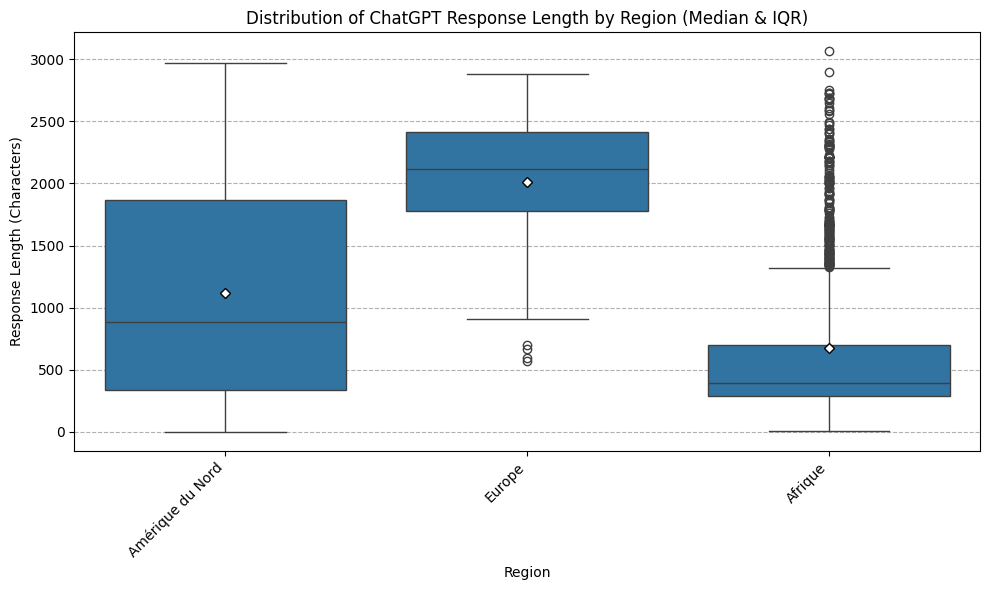

--- Kruskal-Wallis H-test for Group Differences ---
Kruskal-Wallis H-statistic: 149.2045
P-value: 0.0000

STATISTICALLY SIGNIFICANT DIFFERENCE FOUND. Proceeding with Dunn's Post Hoc Test.

--- Dunn's Post Hoc Test (Bonferroni corrected P-values) ---
Interpretation: A value < 0.05 means a significant difference between the two regions.
                  Amérique du Nord  Europe  Afrique
Amérique du Nord               1.0     0.0      0.0
Europe                         0.0     1.0      0.0
Afrique                        0.0     0.0      1.0


In [ ]:
# --- 1. Data Loading and Initial Preparation ---
file_path = 'gmlLab-Reponses-6-mai-2024.csv' #see input files in the repo - this is the combined responses fle
data = pd.read_csv(file_path)
data['response_length'] = data['reponse'].apply(len)
group_col = 'name_fr'
value_col = 'response_length'

# --- 2. Exploratory Statistics: Mean, Median, Std, IQR ---

# Calculate comprehensive stats: Mean, Std, Median, IQR (Q1, Q3)
stats_data_length = data.groupby(group_col)[value_col].agg(
    mean='mean',
    std='std',
    median='median',
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75),
    count='count'
).reset_index()

# Calculate Interquartile Range (IQR) and Standard Error of the Mean (SEM)
stats_data_length['iqr'] = stats_data_length['q3'] - stats_data_length['q1']
stats_data_length['sem'] = stats_data_length['std'] / np.sqrt(stats_data_length['count'])

print("--- Comprehensive Response Length Statistics ---")
print(stats_data_length)
print("\n")


# --- 3. Visualization: Distribution Plots (Boxplot/Violin) ---

plt.figure(figsize=(10, 6))

# boxplot to clearly show Medians and Interquartile Ranges (IQR)
sns.boxplot(x=group_col, y=value_col, data=data, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"})

plt.title('Distribution of ChatGPT Response Length by Region (Median & IQR)')
plt.xlabel('Region')
plt.ylabel('Response Length (Characters)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# --- 4. Nonparametric Statistical Testing: Kruskal-Wallis & Dunn's Post Hoc ---

"""
Note: reviewer suggested addition of Kruskal-Wallis test
In the paper, we do not report on the Dunn's

"""

# Prepare data for Kruskal-Wallis (groups as a list of arrays)
groups = [data[data[group_col] == group][value_col].values for group in data[group_col].unique()]

# 4a. Kruskal-Wallis H-test
print("--- Kruskal-Wallis H-test for Group Differences ---")
H_stat, p_kw = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {H_stat:.4f}")
print(f"P-value: {p_kw:.4f}")

if p_kw < 0.05:
    print("\nSTATISTICALLY SIGNIFICANT DIFFERENCE FOUND. Proceeding with Dunn's Post Hoc Test.")

    # 4b. Dunn's Post Hoc Test (using Bonferroni correction for multiple comparisons)
    # The 'scikit-posthocs' library is used here.
    post_hoc_results = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust='bonferroni')

    print("\n--- Dunn's Post Hoc Test (Bonferroni corrected P-values) ---")
    print("Interpretation: A value < 0.05 means a significant difference between the two regions.")

    # Optional: Format the result for cleaner output
    post_hoc_results.columns = post_hoc_results.index = data[group_col].unique()
    print(post_hoc_results.round(4))

else:
    print("\nNO STATISTICALLY SIGNIFICANT DIFFERENCE was found across all groups (P-value >= 0.05).")

Réponses en Anglais

<ipython-input-9-3c1bd0e379c6>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=stats_data_length, x='name_fr', y='mean', marker='o', err_style="bars", ci=None)


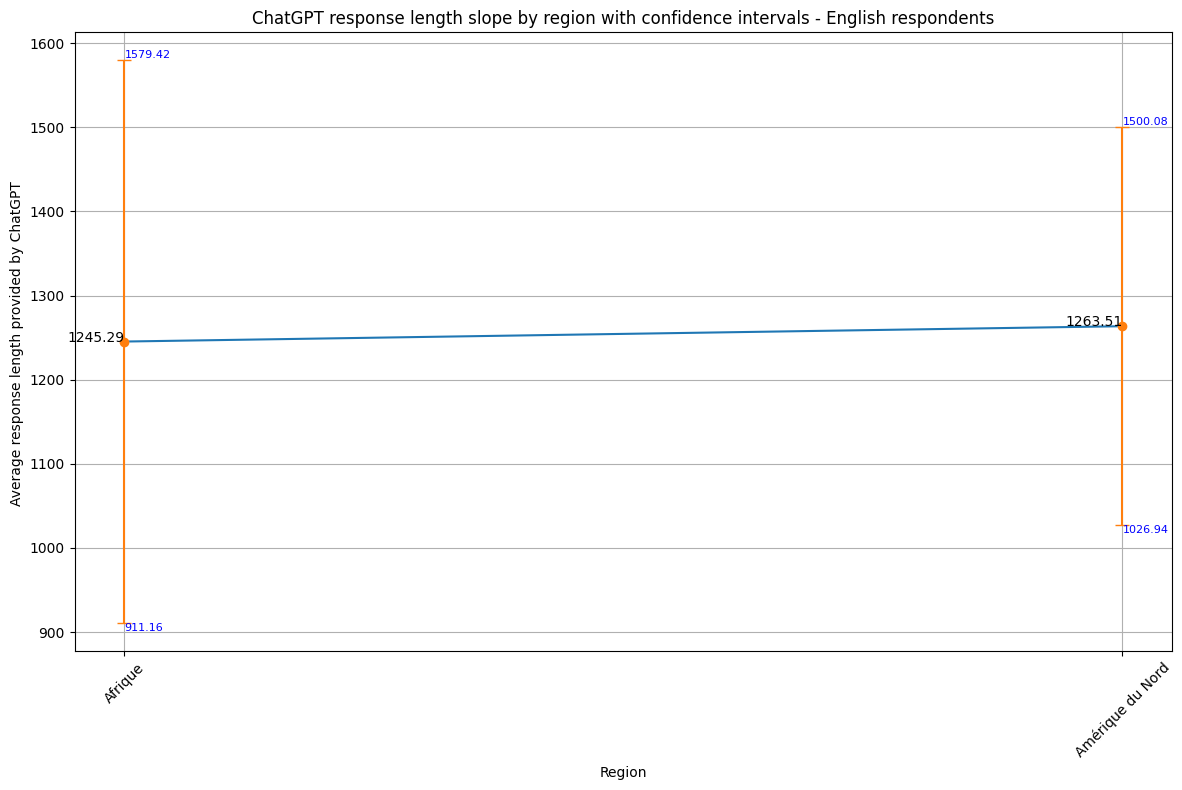

In [ ]:
"""
Processing of English responses separately for clarity.
"""

file_path = 'GML_Lab_EN.csv' #see file containing only English responses
data = pd.read_csv(file_path)

# Calculate the length of each response
data['response_length'] = data['reponse'].apply(len)

# Extract relevant columns
slope_data_length = data[['name_fr', 'response_length']]

# Calculate mean and standard deviation of response lengths for each region
stats_data_length = slope_data_length.groupby('name_fr')['response_length'].agg(['mean', 'std', 'count']).reset_index()

# Calculate the standard error
stats_data_length['sem'] = stats_data_length['std'] / stats_data_length['count'] ** 0.5

# Calculate confidence intervals
stats_data_length['ci_lower'] = stats_data_length['mean'] - 1.96 * stats_data_length['sem']
stats_data_length['ci_upper'] = stats_data_length['mean'] + 1.96 * stats_data_length['sem']

# Plot the slope chart with error bars for response length
plt.figure(figsize=(12, 8))
sns.lineplot(data=stats_data_length, x='name_fr', y='mean', marker='o', err_style="bars", ci=None)

# Add error bars (confidence intervals)
plt.errorbar(stats_data_length['name_fr'], stats_data_length['mean'], yerr=1.96 * stats_data_length['sem'], fmt='o', capsize=5)

# Annotate the points with mean values and confidence intervals
for i, row in stats_data_length.iterrows():
    plt.text(row['name_fr'], row['mean'], f"{round(row['mean'], 2)}", horizontalalignment='right')
    plt.text(row['name_fr'], row['ci_lower'], f"{round(row['ci_lower'], 2)}", verticalalignment='top', fontsize=8, color='blue')
    plt.text(row['name_fr'], row['ci_upper'], f"{round(row['ci_upper'], 2)}", verticalalignment='bottom', fontsize=8, color='blue')

plt.title('ChatGPT response length slope by region with confidence intervals - English respondents')
plt.xlabel('Region')
plt.ylabel('Average response length provided by ChatGPT ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Analyse du taux de réponse - Français. This is not reported in the paper - exploratoru in nature

In [ ]:
file_path = 'gmlLab-Reponses-6-mai-2024.csv'
data = pd.read_csv(file_path)

# Calculate the length of each response
data['response_length'] = data['reponse'].apply(len)

# Convert the timestamp column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the month and year from the timestamp
data['month_year'] = data['timestamp'].dt.to_period('M')

# Aggregate data by region and calculate mean response length and response count by month
aggregated_data = data.groupby(['name_fr', 'month_year'])['response_length'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
aggregated_data.columns = ['Region', 'Month_Year', 'Average_Response_Length', 'Count']

# Display the prepared data
#print(aggregated_data.head())
print(aggregated_data)
aggregated_data.to_csv('all_monthly_aggregated_data.csv', index=False)

             Region Month_Year  Average_Response_Length  Count
0           Afrique    2024-02               887.229452    292
1           Afrique    2024-03               645.905702    456
2           Afrique    2024-04               467.775229    218
3  Amérique du Nord    2024-02              1010.377953    127
4  Amérique du Nord    2024-03              1431.800000     45
5            Europe    2024-02              2040.200000     45
6            Europe    2024-03              1933.466667     15


Au besoin: montrer la distribution de la grandeur des réponses à travers le temps? à discuter avec JFS

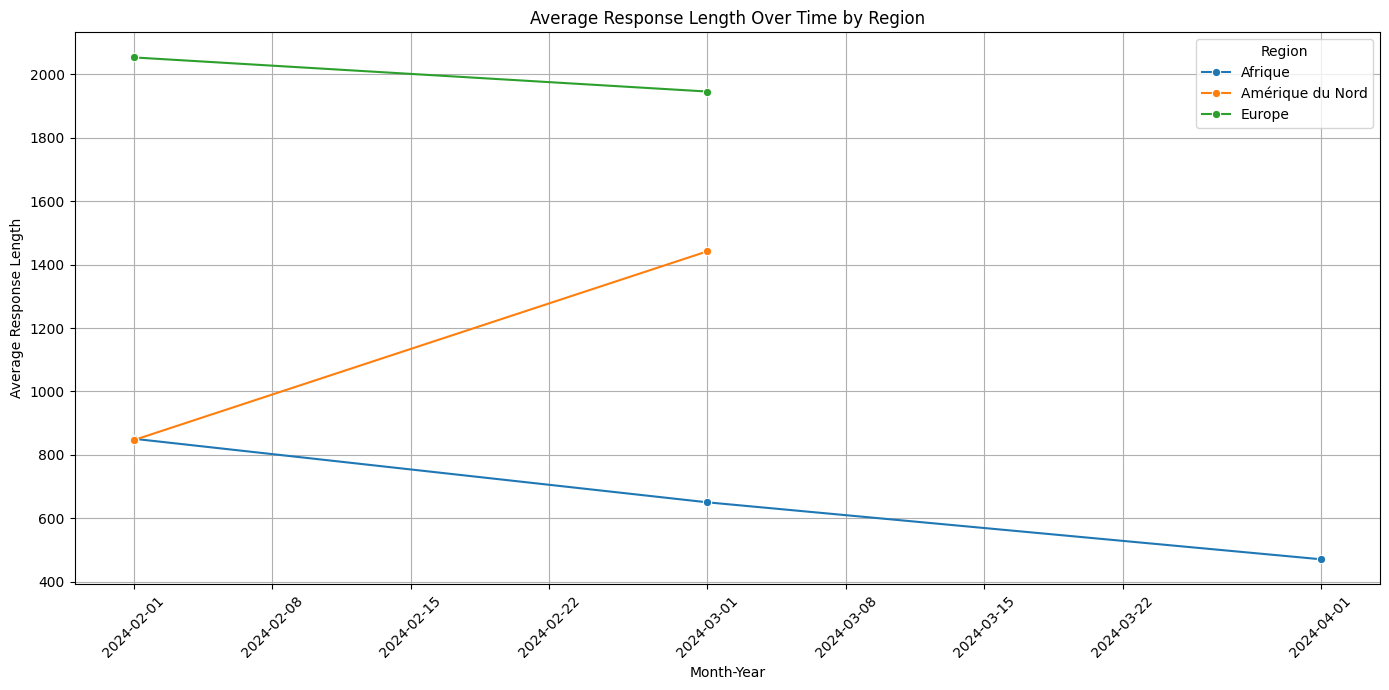

In [ ]:
#garder commented out pour l'instant
"""# Load the CSV file
file_path = 'FR_monthly_aggregated_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Month_Year' column to datetime format
data['Month_Year'] = pd.to_datetime(data['Month_Year'])

# Set the 'Month_Year' column as the index
data.set_index('Month_Year', inplace=True)

# Plot 1: Average Response Length Over Time by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Month_Year', y='Average_Response_Length', hue='Region', marker='o')
plt.title('Average Response Length Over Time by Region')
plt.xlabel('Month-Year')
plt.ylabel('Average Response Length')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()"""


Nombre de réponses au fur du temps - Français

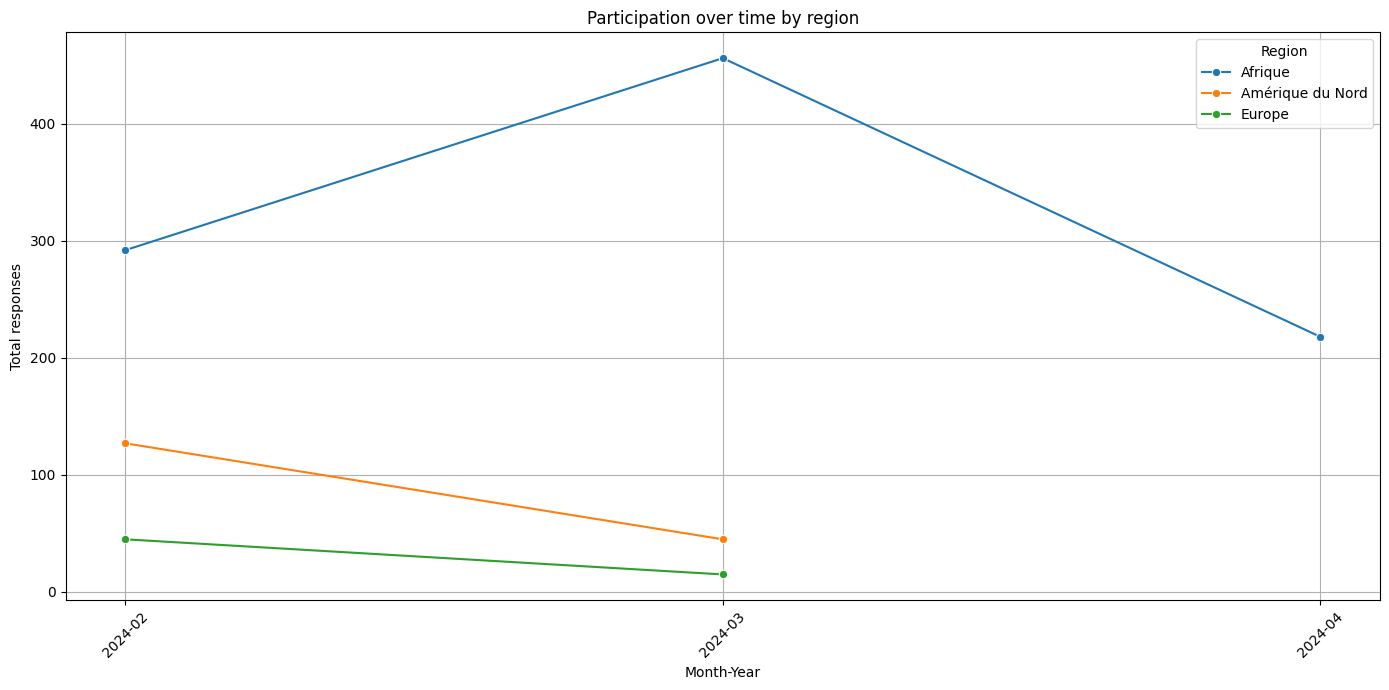

"fig, ax1 = plt.subplots(figsize=(14, 7))\n\ncolor = 'tab:blue'\nax1.set_xlabel('Mois-Année')\nax1.set_ylabel('Longueur moyenne de réponse ', color=color)\nsns.lineplot(data=data, x='Month_Year', y='Average_Response_Length', hue='Region', marker='o', ax=ax1)\nax1.tick_params(axis='y', labelcolor=color)\n\nax2 = ax1.twinx()\ncolor = 'tab:green'\nax2.set_ylabel('Nombre de réponses, ligne --', color=color)\nsns.lineplot(data=data, x='Month_Year', y='Count', hue='Region', marker='o', linestyle='--', ax=ax2)\nax2.tick_params(axis='y', labelcolor=color)\n\nplt.title('Moyenne des réponses et nombre de réponses au fil du temps par région')\nfig.tight_layout()\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.show()"

In [ ]:

# Plot 2: taux de réponse à travers le temps et par région (FR):
file_path = 'all_monthly_aggregated_data.csv'
data = pd.read_csv(file_path)
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Month_Year', y='Count', hue='Region', marker='o')
plt.title('Participation over time by region')
plt.xlabel('Month-Year')
plt.ylabel('Total responses')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Combined Plot
"""fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Mois-Année')
ax1.set_ylabel('Longueur moyenne de réponse ', color=color)
sns.lineplot(data=data, x='Month_Year', y='Average_Response_Length', hue='Region', marker='o', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Nombre de réponses, ligne --', color=color)
sns.lineplot(data=data, x='Month_Year', y='Count', hue='Region', marker='o', linestyle='--', ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Moyenne des réponses et nombre de réponses au fil du temps par région')
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()"""

Diagramme de Sankey - Français - also not reported in the final version of the published paper

In [ ]:
sankey_data=pd.read_csv('all_monthly_aggregated_data.csv')
regions = sankey_data['Region'].tolist()
response_lengths = sankey_data['Average_Response_Length'].tolist()
counts = sankey_data['Count'].tolist()

# Create labels for regions and response length bins
labels = regions + ['Low response rate', 'Average response rate', 'High response rate']

# thresholds for response length bins
low_threshold = 50
high_threshold = 150

# Assign bins to response lengths
sankey_data['length_bin'] = pd.cut(sankey_data['Average_Response_Length'],
                                   bins=[0, low_threshold, high_threshold, float('inf')],
                                   labels=['Low response rate', 'Average response rate', 'High response rate'])

# Create source and target indices for Sankey diagram
source_indices = [labels.index(region) for region in sankey_data['Region']]
target_indices = [labels.index(length_bin) for length_bin in sankey_data['length_bin']]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=counts
    )
))

fig.update_layout(title_text="Analysis of response rate by region - Sankey diagram", font_size=12)
fig.show()
